In [86]:
import numpy as np
import pandas as pd
from os.path import exists
from data import *
from bronx.stdtypes.date import daterangex as rangex
import matplotlib.pyplot as plt
from matplotlib import colors

In [87]:
data_train_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_train/'
data_valid_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_test/'
data_test_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_test/'
data_static_location = '/cnrm/recyf/Data/users/danjoul/dataset/'
baseline_location = '/cnrm/recyf/Data/users/danjoul/dataset/baseline/test/'

In [88]:
'''
Setup
'''
# params = ["t2m", "rr", "rh2m", "tpw850", "ffu", "ffv", "tcwv", "sp", "cape", "hpbl", "ts", "toa","tke","u700","v700","u500","v500", "u10", "v10"]
params = ['t2m']
static_fields = []
dates_train = rangex(['2020070100-2021053100-PT24H']) # à modifier
dates_valid = rangex(['2022020100-2022022800-PT24H', '2022040100-2022043000-PT24H', '2022060100-2022063000-PT24H']) # à modifier
dates_test = rangex(['2022030100-2022033100-PT24H', '2022050100-2022053100-PT24H']) # à modifier
resample = 'r'
param = 't2m'
echeances = range(6, 37, 3)
echeances_baseline = range(6, 37, 3)
working_dir = '/cnrm/recyf/Data/users/danjoul/unet_experiments/unet_4/0.005_32_100/t2m/'

In [89]:
data_pred = np.load(working_dir + 'y_pred.npy')
results_df = pd.DataFrame(
    {'dates' : [],
    'echeances' : [],
    'X_test' : [],
    'baseline' : [],
    'y_pred' : [],
    'y_test' : []}
)
for i_d, d in enumerate(dates_test):
    # Load X_test :
    try:
        if resample == 'c':
            filepath_X_test = data_test_location + 'oper_c_' + d.isoformat() + 'Z_' + param + '.npy'
        else:
            filepath_X_test = data_test_location + 'oper_r_' + d.isoformat() + 'Z_' + param + '.npy'
        X_test = np.load(filepath_X_test)
    except FileNotFoundError:
        print('missing day : ' + d.isoformat())
        X_test = None

    # Load baseline : 
    filepath_baseline = baseline_location + 'GG9B_' + d.isoformat() + 'Z_' + param + '.npy'
    baseline = np.load(filepath_baseline)
    try:
        filepath_baseline = baseline_location + 'GG9B_' + d.isoformat() + 'Z_' + param + '.npy'
        baseline = np.load(filepath_baseline)
    except FileNotFoundError:
        print('missing day : ' + d.isoformat())
        baseline = None

    # Load y_test : 
    try:
        filepath_X_test = data_test_location + 'G9L1_' + d.isoformat() + 'Z_' + param + '.npy'
        y_test = np.load(filepath_X_test)
    except FileNotFoundError:
        print('missing day : ' + d.isoformat())
        y_test = None

    for i_ech, ech in enumerate(echeances):
        try:
            results_d_ech = pd.DataFrame(
                {'dates' : [dates_test[i_d].isoformat()],
                'echeances' : [echeances[i_ech]],
                'X_test' : [X_test[:, :, i_ech]],
                'baseline' : [baseline[:, :, i_ech]],
                'y_pred' : [data_pred[i_d, i_ech, :, :]],
                'y_test' : [y_test[:, :, i_ech]]}
            )
        except TypeError:
            results_d_ech = pd.DataFrame(
                {'dates' : [],
                'echeances' : [],
                'X_test' : [],
                'baseline' : [],
                'y_pred' : [],
                'y_test' : []}
            )
        results_df = pd.concat([results_df, results_d_ech])
results_df = results_df.reset_index(drop=True)

missing day : 2022-05-24T00:00:00


In [90]:
results_df.head(20)

,dates,echeances,X_test,baseline,y_pred,y_test
0,2022-03-01T00:00:00,6.0,"[[300.42328, 300.42328, 300.42328, 300.42328, ...","[[300.42657, 300.42352, 300.42017, 300.41284, ...","[[300.3504, 300.35114, 300.34012, 300.3397, 30...","[[300.40848, 300.41174, 300.4186, 300.42606, 3..."
1,2022-03-01T00:00:00,9.0,"[[300.66666, 300.66666, 300.66666, 300.66666, ...","[[300.66122, 300.6649, 300.66824, 300.6658, 30...","[[300.65622, 300.65198, 300.64584, 300.64658, ...","[[300.66138, 300.6668, 300.66553, 300.67545, 3..."
2,2022-03-01T00:00:00,12.0,"[[301.01196, 301.01196, 301.01196, 301.01196, ...","[[301.03293, 301.02045, 301.00906, 301.0122, 3...","[[301.00043, 300.99704, 300.99695, 300.99072, ...","[[300.96677, 300.94678, 300.95398, 300.94427, ..."
3,2022-03-01T00:00:00,15.0,"[[301.38187, 301.38187, 301.38187, 301.38187, ...","[[301.36826, 301.37573, 301.3823, 301.37448, 3...","[[301.27927, 301.2776, 301.27176, 301.25726, 3...","[[301.33704, 301.3467, 301.35352, 301.36206, 3..."
4,2022-03-01T00:00:00,18.0,"[[301.11276, 301.11276, 301.11276, 301.11276, ...","[[301.11902, 301.11557, 301.1121, 301.11002, 3...","[[301.0148, 301.01862, 301.0144, 300.99515, 30...","[[301.02844, 301.0267, 301.02985, 301.02985, 3..."
5,2022-03-01T00:00:00,21.0,"[[300.74686, 300.74686, 300.74686, 300.74686, ...","[[300.75192, 300.74918, 300.74673, 300.7443, 3...","[[300.6309, 300.6276, 300.62125, 300.58246, 30...","[[300.71515, 300.71204, 300.7079, 300.7044, 30..."
6,2022-03-01T00:00:00,24.0,"[[300.5518, 300.5518, 300.5518, 300.5518, 300....","[[300.54947, 300.54947, 300.54947, 300.5467, 3...","[[300.3425, 300.3284, 300.31458, 300.28574, 30...","[[300.48914, 300.48532, 300.45758, 300.37396, ..."
7,2022-03-01T00:00:00,27.0,"[[300.14355, 300.14355, 300.14355, 300.14355, ...","[[300.1625, 300.1521, 300.14133, 300.13336, 30...","[[300.14685, 300.13885, 300.1405, 300.1327, 30...","[[300.02792, 300.04285, 300.05466, 300.05777, ..."
8,2022-03-01T00:00:00,30.0,"[[300.52103, 300.52103, 300.52103, 300.52103, ...","[[300.51288, 300.51788, 300.52225, 300.51974, ...","[[300.46567, 300.4641, 300.45416, 300.45685, 3...","[[300.4846, 300.4834, 300.48993, 300.50037, 30..."
9,2022-03-01T00:00:00,33.0,"[[300.9275, 300.9275, 300.9275, 300.9275, 300....","[[300.92435, 300.9259, 300.92685, 300.92343, 3...","[[300.90298, 300.902, 300.89575, 300.9005, 300...","[[300.6377, 300.65747, 300.67377, 300.6918, 30..."


In [91]:
print(len(results_df))
results_df[results_df.dates == '2022-05-24T00:00:00'].head(11)

671


,dates,echeances,X_test,baseline,y_pred,y_test


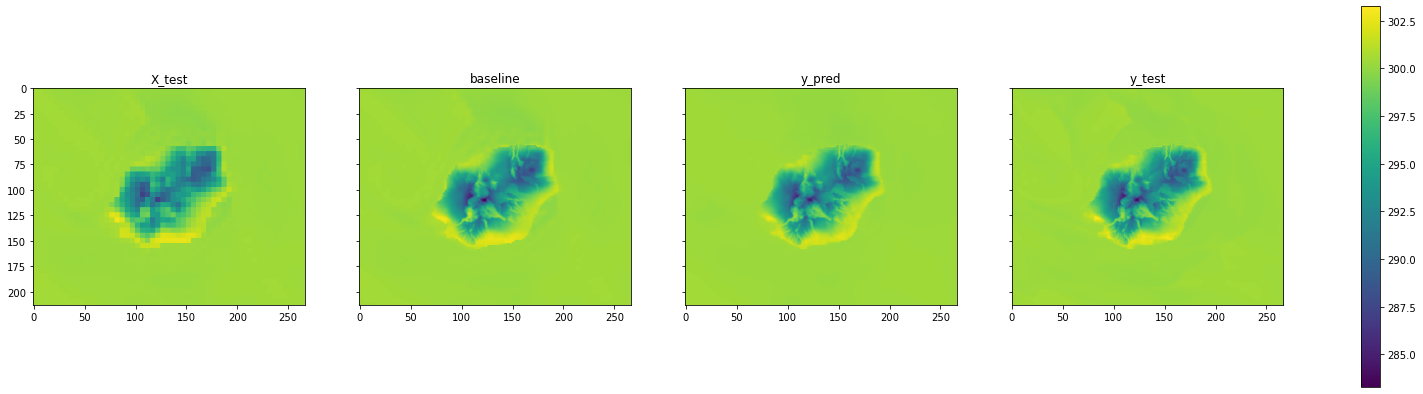

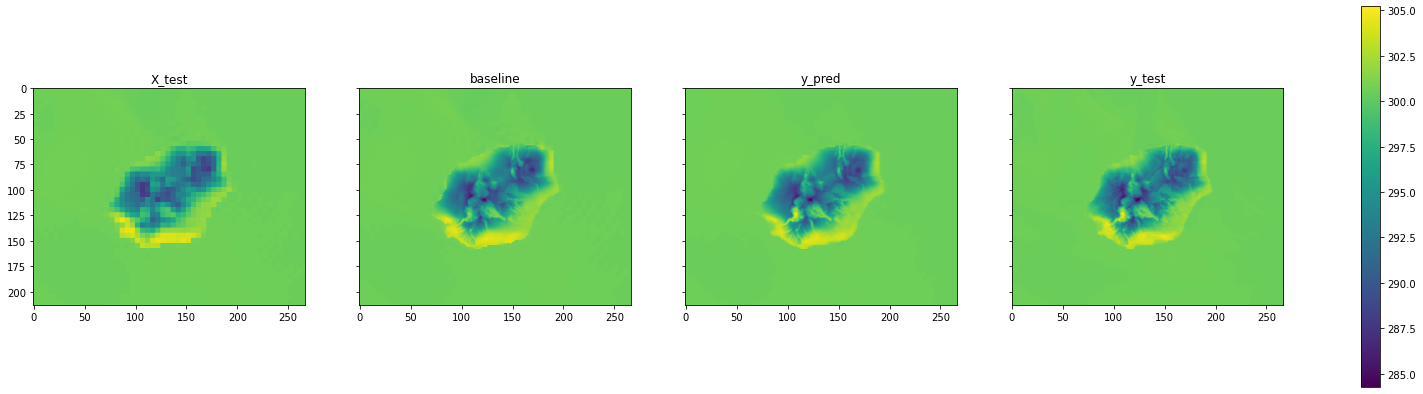

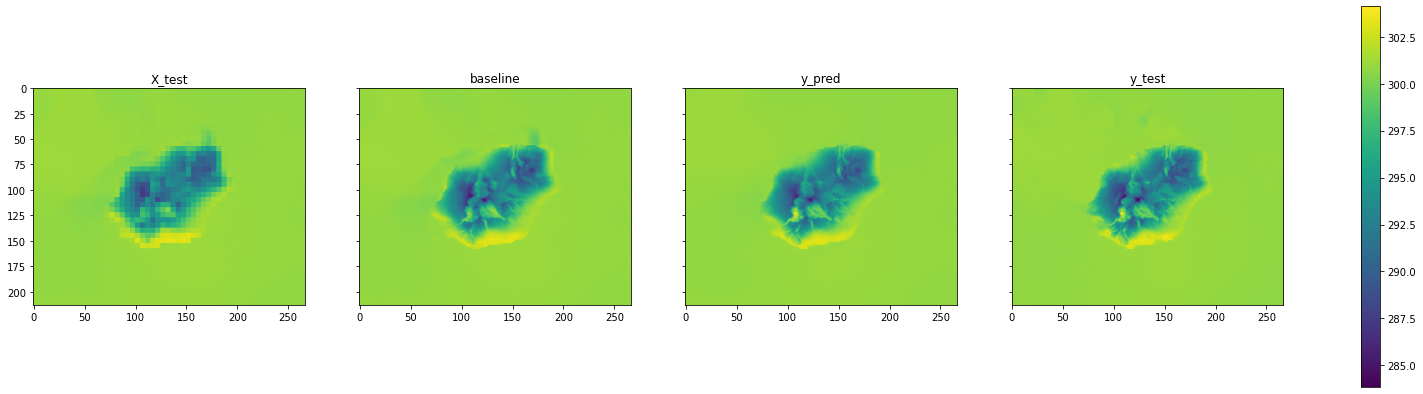

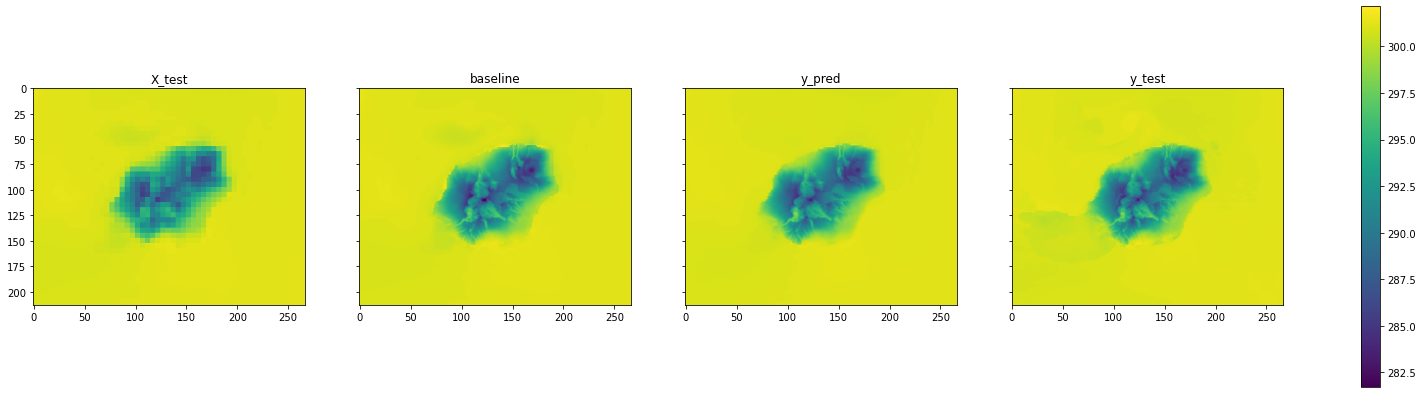

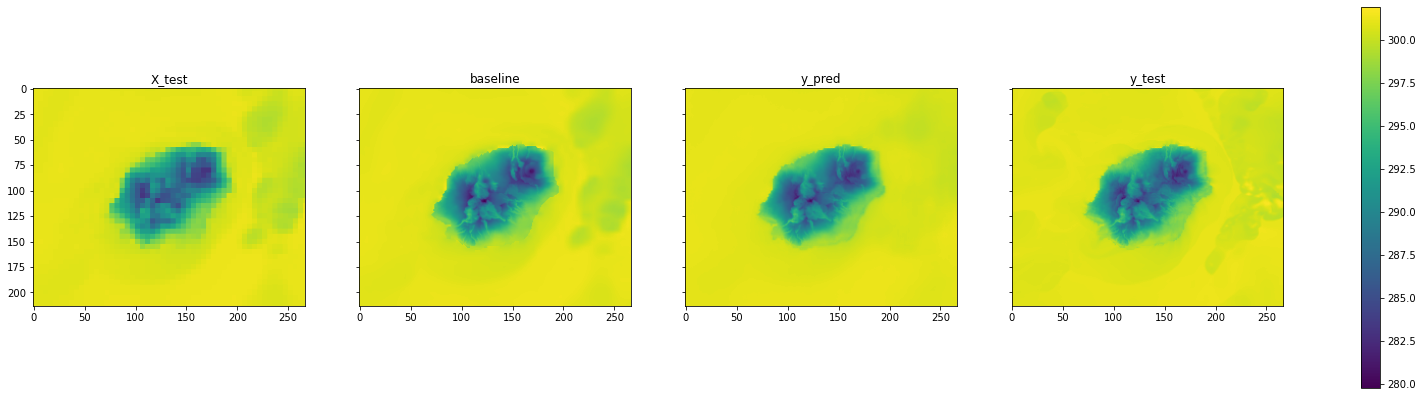

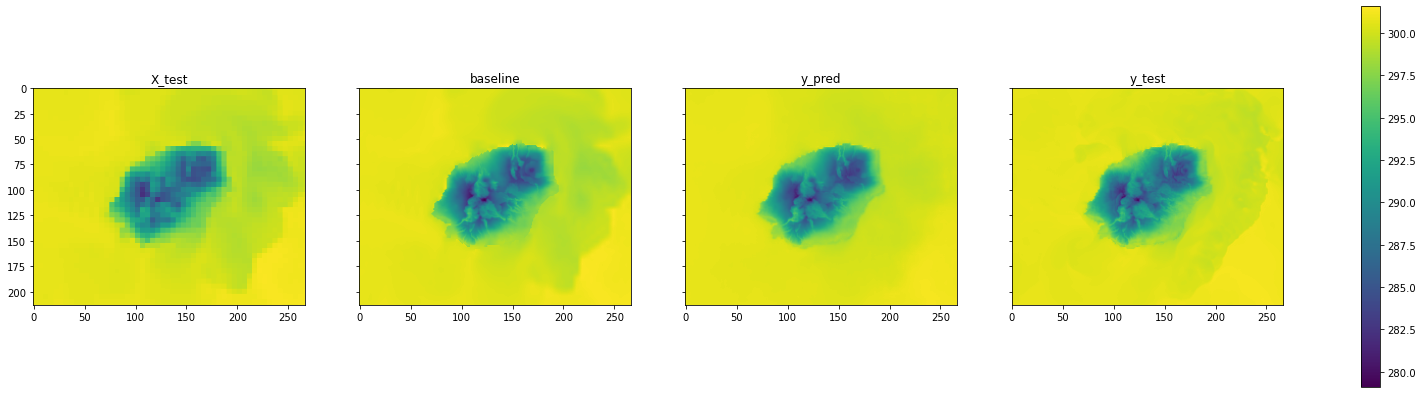

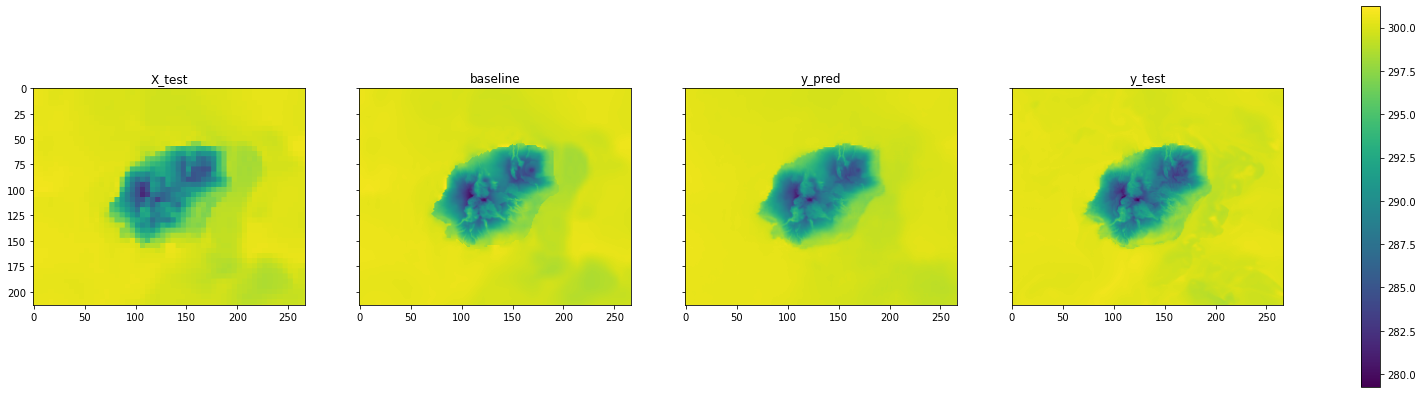

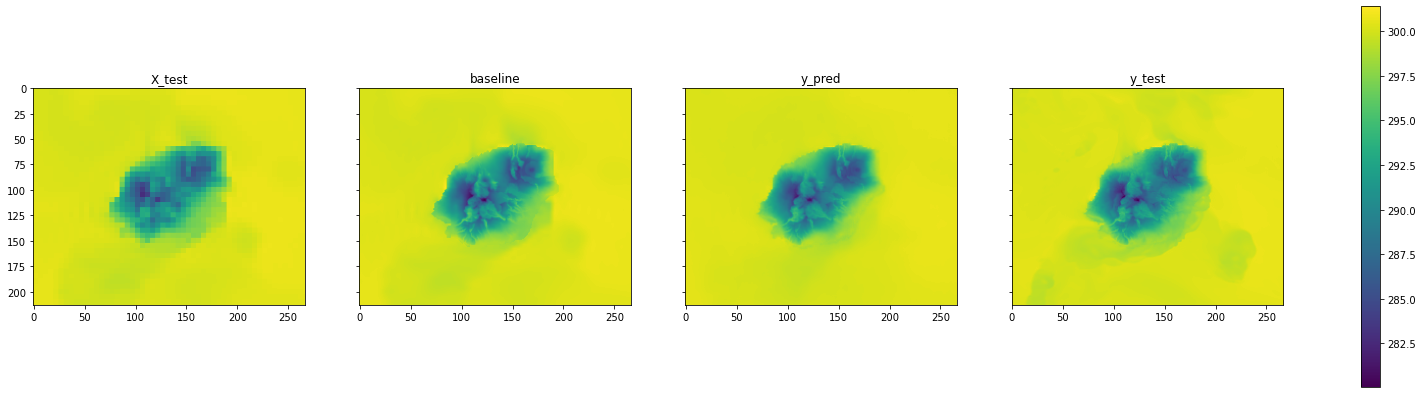

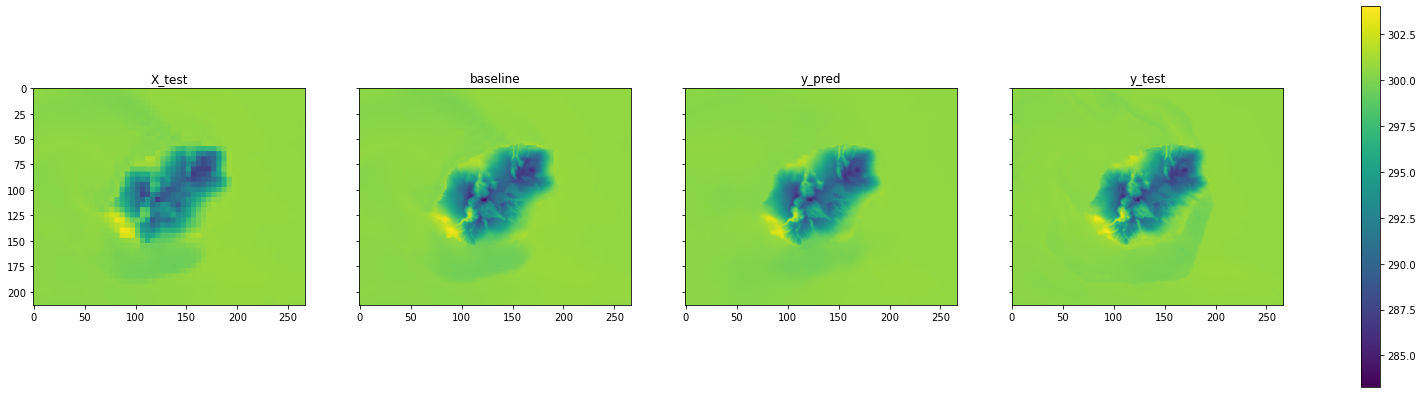

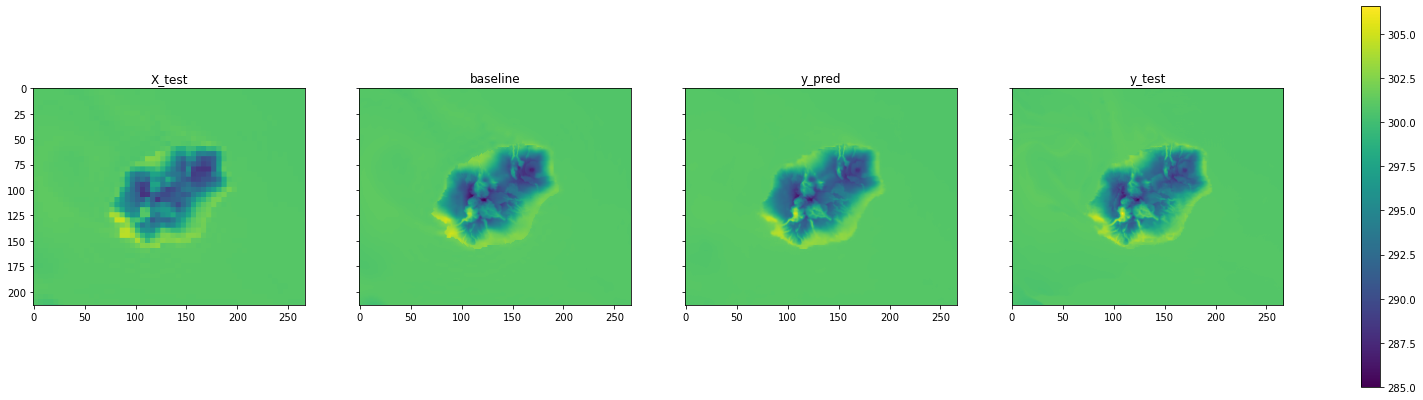

In [92]:
for i in range(10):
    fig, axs = plt.subplots(nrows=1,ncols=4, figsize = (28, 7))
    data = [results_df.X_test[i], results_df.baseline[i], results_df.y_pred[i], results_df.y_test[i]]
    images = []
    for i in range(4):
        images.append(axs[i].imshow(data[i]))
        axs[i].label_outer()
    vmin = min(image.get_array().min() for image in images)
    vmax = max(image.get_array().max() for image in images)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    for im in images:
        im.set_norm(norm)
    axs[0].set_title('X_test')
    axs[1].set_title('baseline')
    axs[2].set_title('y_pred')
    axs[3].set_title('y_test')
    fig.colorbar(images[0], ax=axs)
    # plt.savefig(working_dir + 'results_' + str(i_d) + '_' + str(i_ech) + '_' + param + '.png')

In [93]:
# métriques:

def mse(a, b):
    return (a - b)**2

def mae(a, b):
    return (np.abs(a - b))


# tracer une carte pour une métrique donnée:

def get_scores(results_df, metric, metric_name):
    metric_df = pd.DataFrame(
        {'dates' : [],
        'echeances' : [],
        metric_name + '_baseline_map' : [],
        metric_name + '_y_pred_map' : [],
        metric_name + '_baseline_mean' : [],
        metric_name + '_y_pred_mean' : []}
    )
    for i in range(len(results_df)):
        metric_i = pd.DataFrame(
            {'dates' : [results_df.dates[i]],
            'echeances' : [results_df.echeances[i]],
            metric_name + '_baseline_map' : [metric(results_df.baseline[i], results_df.y_test[i])],
            metric_name + '_y_pred_map' : [metric(results_df.y_pred[i], results_df.y_test[i])],
            metric_name + '_baseline_mean' : [np.mean(metric(results_df.baseline[i], results_df.y_test[i]))],
            metric_name + '_y_pred_mean' : [np.mean(metric(results_df.y_pred[i], results_df.y_test[i]))]}
        )
        metric_df = pd.concat([metric_df, metric_i])
    return metric_df.reset_index(drop=True)

metric_df = get_scores(results_df, mse, 'mse')


In [94]:
metric_df.head(20)

,dates,echeances,mse_baseline_map,mse_y_pred_map,mse_baseline_mean,mse_y_pred_mean
0,2022-03-01T00:00:00,6.0,"[[0.00032749865, 0.00013876334, 2.42237e-06, 0...","[[0.0033727, 0.0036733188, 0.00616087, 0.00745...",0.063036,0.031003
1,2022-03-01T00:00:00,9.0,"[[2.3283064e-08, 3.6964193e-06, 7.377006e-06, ...","[[2.6599504e-05, 0.00021997467, 0.00038745347,...",0.138808,0.068152
2,2022-03-01T00:00:00,12.0,"[[0.0043774247, 0.0054271854, 0.0030342722, 0....","[[0.0011330554, 0.002526314, 0.0018463135, 0.0...",0.111484,0.062184
3,2022-03-01T00:00:00,15.0,"[[0.0009746561, 0.00084228907, 0.00082817767, ...","[[0.003337347, 0.0047778944, 0.0066841403, 0.0...",0.062479,0.039937
4,2022-03-01T00:00:00,18.0,"[[0.008204043, 0.007897377, 0.006764219, 0.006...","[[0.00018608663, 6.540213e-05, 0.0002384521, 0...",0.167138,0.086923
5,2022-03-01T00:00:00,21.0,"[[0.0013523037, 0.0013793716, 0.0015092352, 0....","[[0.0070995847, 0.007130475, 0.0075063864, 0.0...",0.294968,0.101996
6,2022-03-01T00:00:00,24.0,"[[0.0036401013, 0.0041149594, 0.008443483, 0.0...","[[0.021502398, 0.024624322, 0.020450536, 0.007...",0.219699,0.102627
7,2022-03-01T00:00:00,27.0,"[[0.018112455, 0.011936203, 0.0075116754, 0.00...","[[0.014143632, 0.009217594, 0.0073695267, 0.00...",0.179761,0.153471
8,2022-03-01T00:00:00,30.0,"[[0.0008003125, 0.0011892058, 0.0010444606, 0....","[[0.0003580004, 0.0003719926, 0.0012792498, 0....",0.195064,0.107220
9,2022-03-01T00:00:00,33.0,"[[0.082169145, 0.07205607, 0.06405064, 0.05365...","[[0.070378415, 0.059798516, 0.04927728, 0.0435...",0.224236,0.138349


In [95]:
def get_ind_terre_mer_500m():
    filepath = '/cnrm/recyf/Data/users/danjoul/dataset/static_G9KP_SURFIND.TERREMER.npy'
    return np.load(filepath)

def get_scores_terre(results_df, metric, metric_name):
    metric_df = get_scores(results_df, metric, metric_name)
    ind_terre_mer = get_ind_terre_mer_500m()
    metric_terre_df = pd.DataFrame(
        {'dates' : [],
        'echeances' : [],
        metric_name + '_baseline_terre_map' : [],
        metric_name + '_y_pred_terre_map' : [],
        metric_name + '_baseline_terre_mean' : [],
        metric_name + '_y_pred_terre_mean' : []}
    )
    for i in range(len(results_df)):
        metric_i = pd.DataFrame(
            {'dates' : [results_df.dates[i]],
            'echeances' : [results_df.echeances[i]],
            metric_name + '_baseline_terre_map' : [metric_df[metric_name + '_baseline_map'][i]*ind_terre_mer],
            metric_name + '_y_pred_terre_map' : [metric_df[metric_name + '_y_pred_map'][i]*ind_terre_mer],
            metric_name + '_baseline_terre_mean' : [np.sum(metric_df[metric_name + '_baseline_map'][i]*ind_terre_mer)/np.sum(ind_terre_mer)],
            metric_name + '_y_pred_terre_mean' : [np.sum(metric_df[metric_name + '_y_pred_map'][i]*ind_terre_mer)/np.sum(ind_terre_mer)]}
        )
        metric_terre_df = pd.concat([metric_terre_df, metric_i])
    return metric_terre_df.reset_index(drop=True)


def get_scores_mer(results_df, metric, metric_name):
    metric_df = get_scores(results_df, metric, metric_name)
    ind_terre_mer = get_ind_terre_mer_500m()
    metric_mer_df = pd.DataFrame(
        {'dates' : [],
        'echeances' : [],
        metric_name + '_baseline_mer_map' : [],
        metric_name + '_y_pred_mer_map' : [],
        metric_name + '_baseline_mer_mean' : [],
        metric_name + '_y_pred_mer_mean' : []}
    )
    for i in range(len(results_df)):
        metric_i = pd.DataFrame(
            {'dates' : [results_df.dates[i]],
            'echeances' : [results_df.echeances[i]],
            metric_name + '_baseline_mer_map' : [metric_df[metric_name + '_baseline_map'][i]*(1-ind_terre_mer)],
            metric_name + '_y_pred_mer_map' : [metric_df[metric_name + '_y_pred_map'][i]*(1-ind_terre_mer)],
            metric_name + '_baseline_mer_mean' : [np.sum(metric_df[metric_name + '_baseline_map'][i]*(1-ind_terre_mer))/np.sum((1-ind_terre_mer))],
            metric_name + '_y_pred_mer_mean' : [np.sum(metric_df[metric_name + '_y_pred_map'][i]*(1-ind_terre_mer))/np.sum((1-ind_terre_mer))]}
        )
        metric_mer_df = pd.concat([metric_mer_df, metric_i])
    return metric_mer_df.reset_index(drop=True)

metric_terre_df = get_scores_terre(results_df, mse, 'mse')
metric_mer_df = get_scores_mer(results_df, mse, 'mse')
    

In [96]:
metric_terre_df.head(5)

,dates,echeances,mse_baseline_terre_map,mse_y_pred_terre_map,mse_baseline_terre_mean,mse_y_pred_terre_mean
0,2022-03-01T00:00:00,6.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.352307,0.159641
1,2022-03-01T00:00:00,9.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.865146,0.419339
2,2022-03-01T00:00:00,12.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.611225,0.352843
3,2022-03-01T00:00:00,15.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.235200,0.134465
4,2022-03-01T00:00:00,18.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.459331,0.200414


In [97]:
metric_mer_df.head(5)

,dates,echeances,mse_baseline_mer_map,mse_y_pred_mer_map,mse_baseline_mer_mean,mse_y_pred_mer_mean
0,2022-03-01T00:00:00,6.0,"[[0.00032749865, 0.00013876334, 2.42237e-06, 0...","[[0.0033727, 0.0036733188, 0.00616087, 0.00745...",0.009998,0.007417
1,2022-03-01T00:00:00,9.0,"[[2.3283064e-08, 3.6964193e-06, 7.377006e-06, ...","[[2.6599504e-05, 0.00021997467, 0.00038745347,...",0.005634,0.003762
2,2022-03-01T00:00:00,12.0,"[[0.0043774247, 0.0054271854, 0.0030342722, 0....","[[0.0011330554, 0.002526314, 0.0018463135, 0.0...",0.019857,0.008892
3,2022-03-01T00:00:00,15.0,"[[0.0009746561, 0.00084228907, 0.00082817767, ...","[[0.003337347, 0.0047778944, 0.0066841403, 0.0...",0.030810,0.022605
4,2022-03-01T00:00:00,18.0,"[[0.008204043, 0.007897377, 0.006764219, 0.006...","[[0.00018608663, 6.540213e-05, 0.0002384521, 0...",0.113565,0.066115


In [98]:
print(list(get_scores(results_df, mse, 'mse')['mse_baseline_mean']))

[0.06303554028272629, 0.13880755007266998, 0.11148382723331451, 0.06247866898775101, 0.16713780164718628, 0.29496797919273376, 0.21969924867153168, 0.17976130545139313, 0.19506411254405975, 0.2242356836795807, 0.21873340010643005, 0.19619375467300415, 0.26840701699256897, 0.2518836557865143, 0.1400296539068222, 0.10077890008687973, 0.09239307045936584, 0.0995204821228981, 0.12141939252614975, 0.09950066357851028, 0.15698477625846863, 0.20151454210281372, 0.07507865875959396, 0.1569989174604416, 0.2618055045604706, 0.06166064366698265, 0.08804760128259659, 0.13229364156723022, 0.10662741959095001, 0.08848223835229874, 0.12069091945886612, 0.19718025624752045, 0.2138119488954544, 0.5868769288063049, 0.2587276101112366, 0.38946402072906494, 0.21786701679229736, 0.2670861780643463, 0.49389752745628357, 0.1398722231388092, 0.1419290006160736, 0.2236114889383316, 0.2023315131664276, 0.26047664880752563, 0.18779334425926208, 0.1781517118215561, 0.1615792065858841, 0.07664592564105988, 0.10904

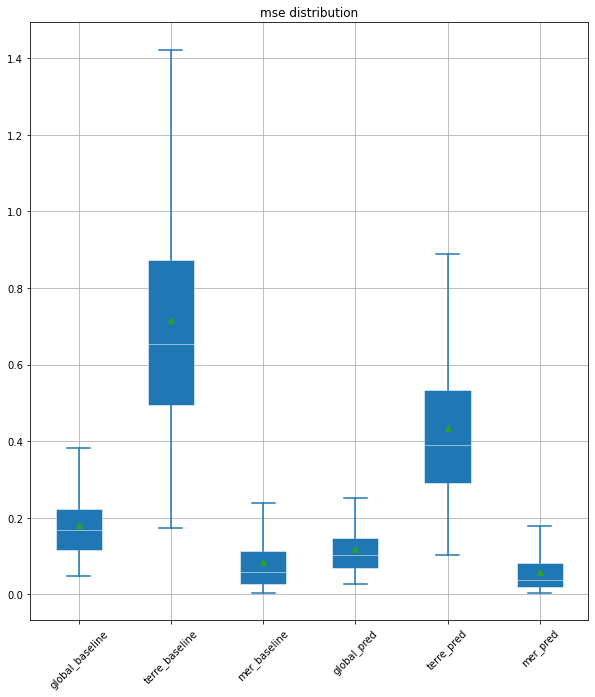

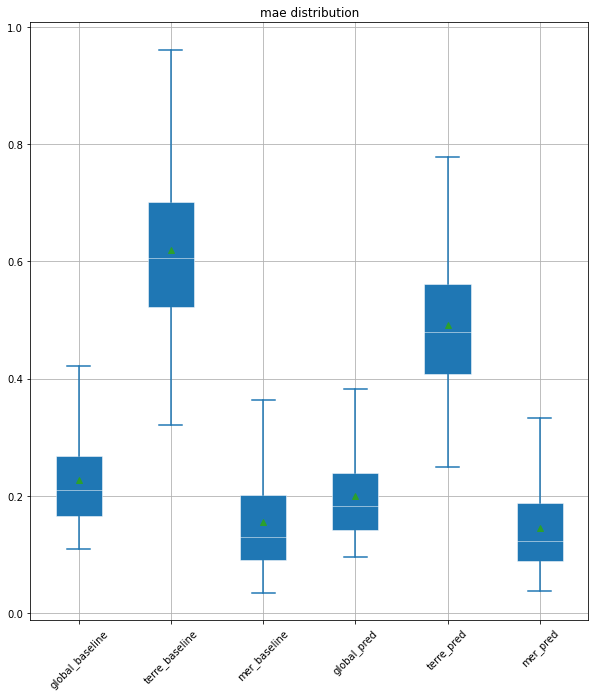

In [99]:
# box plot

def plot_distrib(results_df, metric, metric_name, output_dir):
        score_baseline = get_scores(results_df, metric, metric_name)[metric_name + '_baseline_mean']
        score_baseline_terre = get_scores_terre(results_df, metric, metric_name)[metric_name + '_baseline_terre_mean']
        score_baseline_mer = get_scores_mer(results_df, metric, metric_name)[metric_name + '_baseline_mer_mean']
        score_pred = get_scores(results_df, metric, metric_name)[metric_name + '_y_pred_mean']
        score_pred_terre = get_scores_terre(results_df, metric, metric_name)[metric_name + '_y_pred_terre_mean']
        score_pred_mer = get_scores_mer(results_df, metric, metric_name)[metric_name + '_y_pred_mer_mean']
        
        D_baseline = np.zeros((len(score_baseline), 3))
        for i in range(len(score_baseline)):
            D_baseline[i, 0] = score_baseline[i]
            D_baseline[i, 1] = score_baseline_terre[i]
            D_baseline[i, 2] = score_baseline_mer[i]

        D_pred = np.zeros((len(score_pred), 3))
        for i in range(len(score_pred)):
            D_pred[i, 0] = score_pred[i]
            D_pred[i, 1] = score_pred_terre[i]
            D_pred[i, 2] = score_pred_mer[i]

        D = np.concatenate([D_baseline, D_pred], axis=1)
        # labels = ['global', 'terre', 'mer']
        labels = ['global_baseline', 'terre_baseline', 'mer_baseline', 'global_pred', 'terre_pred', 'mer_pred']

        fig, ax = plt.subplots(figsize=(10, 11))
        plt.grid()
        VP = ax.boxplot(D, positions=[3, 6, 9, 12, 15, 18], widths=1.5, patch_artist=True,
                        showmeans=True, showfliers=False,
                        medianprops={"color": "white", "linewidth": 0.5},
                        boxprops={"facecolor": "C0", "edgecolor": "white",
                                "linewidth": 0.5},
                        whiskerprops={"color": "C0", "linewidth": 1.5},
                        capprops={"color": "C0", "linewidth": 1.5},
                        labels=labels)
        ax.set_title(metric_name + ' distribution')
        ax.tick_params(axis='x', rotation=45)

        # plt.savefig(output_dir + 'distribution_' +  metric_name + '.png')

plot_distrib(results_df, mse, 'mse', '.')
plot_distrib(results_df, mae, 'mae', '.')